# Value at Risk (VaR) and Conditional Value at Risk (CVaR) Analysis

This notebook analyzes portfolio risk using both VaR and CVaR metrics. We'll calculate these risk measures using three different approaches:
1. Historical method
2. Parametric (Normal) method
3. Monte Carlo simulation

Let's start by importing our libraries and loading the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set_theme(style='whitegrid', palette='husl')

In [2]:
# Load the portfolio returns data
returns_df = pd.read_csv('data/mock_portfolio_returns.csv')
portfolio_returns = returns_df['Portfolio']

# Display first few rows and basic statistics
print("First few rows of the data:")
display(returns_df.head())

print("\nBasic statistics of portfolio returns:")
display(portfolio_returns.describe())

First few rows of the data:


,AAPL,MSFT,TSLA,JPM,Portfolio
0,0.010434,-0.018513,0.033216,-0.008932,0.008899
1,-0.002265,0.014168,0.067630,-0.013217,0.021086
2,0.013454,0.032232,-0.048150,-0.009459,-0.021446
3,0.030961,0.015887,0.020504,0.010836,0.016378
4,-0.004183,-0.022391,-0.021972,-0.009194,-0.014515



Basic statistics of portfolio returns:


count    250.000000
mean       0.000218
std        0.014493
min       -0.041201
25%       -0.008800
50%        0.000044
75%        0.009264
max        0.037574
Name: Portfolio, dtype: float64

## Value at Risk (VaR) Calculations

VaR measures the maximum potential loss at a given confidence level. We'll calculate both 95% and 99% VaR using three different methods.

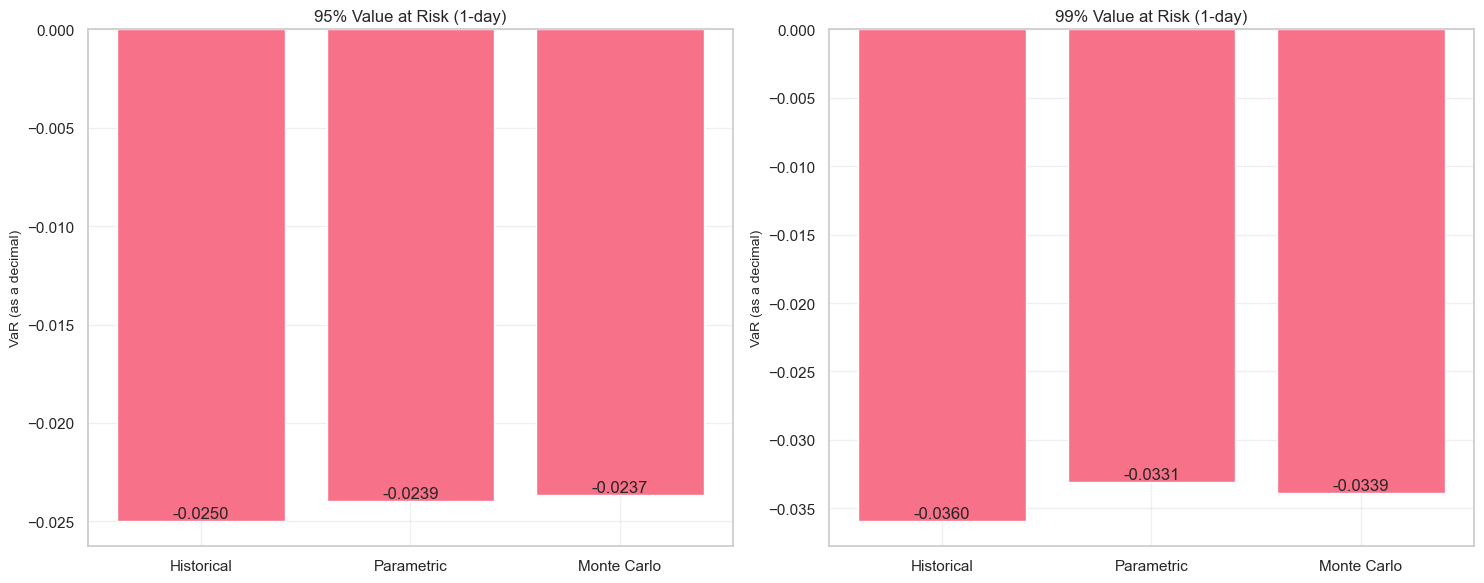

In [3]:
def calculate_var(confidence_level):
    percentile = 100 - confidence_level
    
    # Historical VaR
    historical_var = np.percentile(portfolio_returns, percentile)
    
    # Parametric VaR (assuming normal distribution)
    mean_return = portfolio_returns.mean()
    std_return = portfolio_returns.std()
    parametric_var = mean_return + std_return * np.percentile(np.random.standard_normal(10000), percentile)
    
    # Monte Carlo VaR
    n_simulations = 10000
    mc_returns = np.random.normal(mean_return, std_return, n_simulations)
    mc_var = np.percentile(mc_returns, percentile)
    
    return {
        'Historical': historical_var,
        'Parametric': parametric_var,
        'Monte Carlo': mc_var
    }

# Calculate VaR values for both confidence levels
var_95 = calculate_var(95)
var_99 = calculate_var(99)

# Create subplots for VaR comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 95% VaR
methods = list(var_95.keys())
values_95 = list(var_95.values())
bars1 = ax1.bar(methods, values_95)
ax1.set_title('95% Value at Risk (1-day)', fontsize=12)
ax1.set_ylabel('VaR (as a decimal)', fontsize=10)
ax1.grid(True, alpha=0.3)

# Add value labels for 95% VaR
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Plot 99% VaR
values_99 = list(var_99.values())
bars2 = ax2.bar(methods, values_99)
ax2.set_title('99% Value at Risk (1-day)', fontsize=12)
ax2.set_ylabel('VaR (as a decimal)', fontsize=10)
ax2.grid(True, alpha=0.3)

# Add value labels for 99% VaR
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Conditional Value at Risk (CVaR)

CVaR, also known as Expected Shortfall, measures the expected loss in the worst-case scenarios beyond the VaR threshold. It provides a more comprehensive view of tail risk than VaR alone.

### CVaR Interpretation
- **Method**: Calculates the average of all losses that exceed the VaR threshold
- **Advantages**:
  - More sensitive to the shape of the loss distribution in the tail
  - Provides a more complete picture of extreme losses
  - Coherent risk measure (satisfies subadditivity)
- **Calculation**: Average of all returns that are worse than the VaR threshold

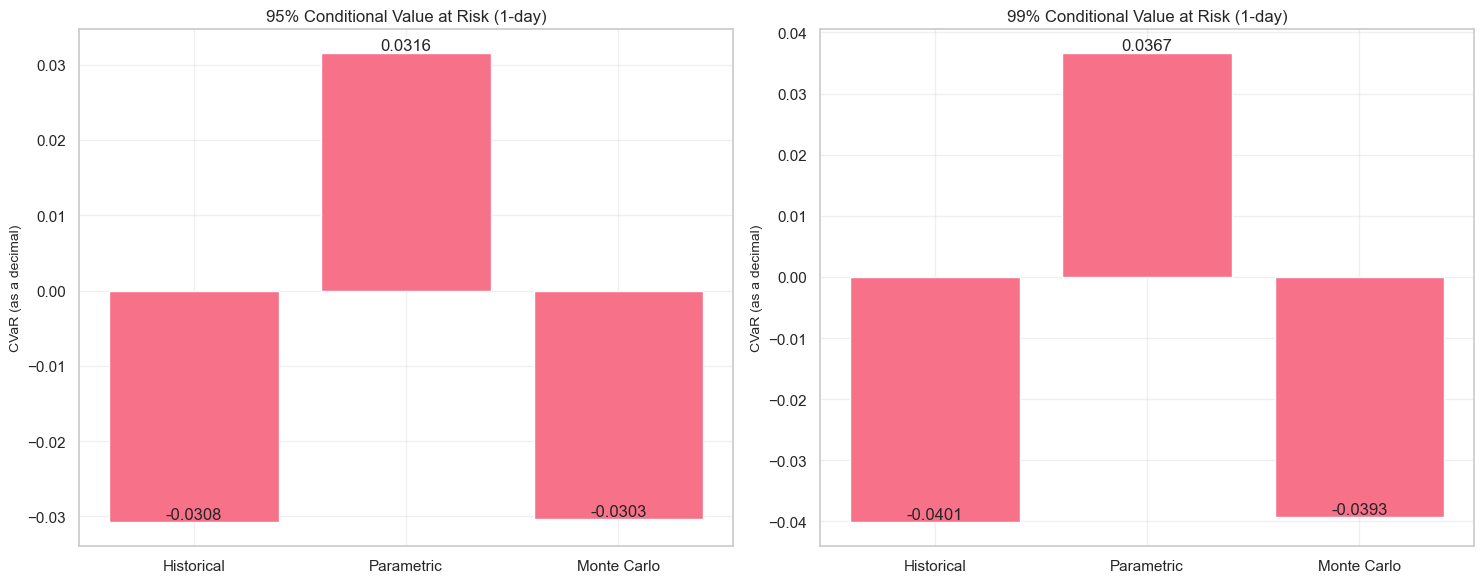


Comparison of VaR and CVaR (95% confidence level):


,VaR,CVaR
Historical,-0.024992,-0.030787
Parametric,-0.023950,0.031555
Monte Carlo,-0.023654,-0.030288



Comparison of VaR and CVaR (99% confidence level):


,VaR,CVaR
Historical,-0.035950,-0.040149
Parametric,-0.033054,0.036660
Monte Carlo,-0.033875,-0.039297


In [4]:
def calculate_cvar(confidence_level):
    percentile = 100 - confidence_level
    
    # Historical CVaR
    var = np.percentile(portfolio_returns, percentile)
    historical_cvar = portfolio_returns[portfolio_returns <= var].mean()
    
    # Parametric CVaR (assuming normal distribution)
    mean_return = portfolio_returns.mean()
    std_return = portfolio_returns.std()
    z_score = np.percentile(np.random.standard_normal(10000), percentile)
    alpha = confidence_level / 100
    parametric_cvar = mean_return + std_return * (np.exp(-0.5 * z_score**2) / (np.sqrt(2 * np.pi) * (1 - alpha)))
    
    # Monte Carlo CVaR
    n_simulations = 10000
    mc_returns = np.random.normal(mean_return, std_return, n_simulations)
    mc_var = np.percentile(mc_returns, percentile)
    mc_cvar = mc_returns[mc_returns <= mc_var].mean()
    
    return {
        'Historical': historical_cvar,
        'Parametric': parametric_cvar,
        'Monte Carlo': mc_cvar
    }

# Calculate CVaR values for both confidence levels
cvar_95 = calculate_cvar(95)
cvar_99 = calculate_cvar(99)

# Create subplots for CVaR comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 95% CVaR
methods = list(cvar_95.keys())
values_95 = list(cvar_95.values())
bars1 = ax1.bar(methods, values_95)
ax1.set_title('95% Conditional Value at Risk (1-day)', fontsize=12)
ax1.set_ylabel('CVaR (as a decimal)', fontsize=10)
ax1.grid(True, alpha=0.3)

# Add value labels for 95% CVaR
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Plot 99% CVaR
values_99 = list(cvar_99.values())
bars2 = ax2.bar(methods, values_99)
ax2.set_title('99% Conditional Value at Risk (1-day)', fontsize=12)
ax2.set_ylabel('CVaR (as a decimal)', fontsize=10)
ax2.grid(True, alpha=0.3)

# Add value labels for 99% CVaR
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Compare VaR and CVaR
print("\nComparison of VaR and CVaR (95% confidence level):")
comparison_95 = pd.DataFrame({
    'VaR': var_95,
    'CVaR': cvar_95
})
display(comparison_95)

print("\nComparison of VaR and CVaR (99% confidence level):")
comparison_99 = pd.DataFrame({
    'VaR': var_99,
    'CVaR': cvar_99
})
display(comparison_99)

## Interpretation of Results

### Key Observations:
1. CVaR values are always more negative than VaR values, as they represent the average of all losses beyond the VaR threshold
2. The difference between VaR and CVaR indicates the severity of tail risk in the portfolio
3. Higher confidence levels (99% vs 95%) result in more extreme risk measures
4. Different calculation methods may yield varying results, highlighting the importance of understanding the underlying assumptions 